Sophia Ackermann & Timo Günther

In Anlehnung an den Code von Gruppe 2

In [1]:
!pip install transformers datasets

     |████████████████████████████████| 2.5MB 8.7MB/s 
     |████████████████████████████████| 245kB 49.3MB/s 
     |████████████████████████████████| 3.3MB 49.1MB/s 
     |████████████████████████████████| 901kB 46.4MB/s 
     |████████████████████████████████| 245kB 50.8MB/s 
     |████████████████████████████████| 122kB 49.7MB/s 


In [2]:
from datasets import load_dataset
import tensorflow as tf

##Laden des Datensatzes

In [3]:
dataset = load_dataset('gnad10', split='train')

Using custom data configuration default


Dataset gnad10 downloaded and prepared to /root/.cache/huggingface/datasets/gnad10/default/1.1.0/3a8445be65795ad88270af4d797034c3d99f70f8352ca658c586faf1cf960881. Subsequent calls will reuse this data.


In [4]:
dataset

Dataset({
    features: ['label', 'text'],
    num_rows: 9245
})

In [5]:
# Schauen ob das funktioniert:
dataset_test = load_dataset('gnad10', split='test')
dataset_test

Using custom data configuration default
Reusing dataset gnad10 (/root/.cache/huggingface/datasets/gnad10/default/1.1.0/3a8445be65795ad88270af4d797034c3d99f70f8352ca658c586faf1cf960881)


Dataset({
    features: ['label', 'text'],
    num_rows: 1028
})

In [6]:
def binarize(example):
     if example['label'] != 0:
       example['label'] = 1
       return example    
     else:
       example['label'] = 0
     return example

updated_dataset = dataset.map(binarize)
updated_dataset_test = dataset_test.map(binarize)

In [7]:
updated_dataset[:20]

{'label': [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
 'text': ['21-Jähriger fällt wohl bis Saisonende aus. Wien – Rapid muss wohl bis Saisonende auf Offensivspieler Thomas Murg verzichten. Der im Winter aus Ried gekommene 21-Jährige erlitt beim 0:4-Heimdebakel gegen Admira Wacker Mödling am Samstag einen Teilriss des Innenbandes im linken Knie, wie eine Magnetresonanz-Untersuchung am Donnerstag ergab. Murg erhielt eine Schiene, muss aber nicht operiert werden. Dennoch steht ihm eine mehrwöchige Pause bevor.',
  'Erfundene Bilder zu Filmen, die als verloren gelten: "The Forbidden Room" von Guy Maddin und Evan Johnson ist ein surrealer Ritt durch die magischen Labyrinthe des frühen Kinos. Wien – Die Filmgeschichte ist ein Friedhof der Verlorenen. Unter den Begrabenen finden sich zahllose Filme, von denen nur noch mysteriös oder abenteuerlich klingende Namen kursieren; und solche, über die verstreut herumliegendes Sekundärmaterial Aufschluss erlaubt. Einer davon ist The

In [8]:
updated_dataset_test[:10]

{'label': [1, 1, 0, 1, 1, 0, 1, 1, 1, 0],
 'text': ['Die Gewerkschaft GPA-djp lanciert den "All-in-Rechner" und findet, dass die Vertragsform auf die Führungsebene beschränkt gehört. Wien – Die Gewerkschaft GPA-djp sieht Handlungsbedarf bei sogenannten All-in-Verträgen. Für mehr Transparenz haben die Gewerkschaft nun unter www.allinrechner.at ein Online-Werkzeug lanciert, das Arbeitnehmern mit solchen Verträgen helfen soll, sich einen Überblick zu verschaffen. Es geht darum, ob die Differenz zum Grundgehalt nicht womöglich eine zu geringe ist. Schließlich sei ein All-in-Gehalt oft nur auf den ersten Blick von Vorteil, gab GPA-djp-Chef Wolfgang Katzian (SPÖ) am Montag bei einer Pressekonferenz in Wien zu bedenken. Allzu oft sei bei der All-in-Entlohnung nur schwer nachvollziehbar, wie viele Überstunden und Mehrleistungen damit tatsächlich abgegolten werden. Ein erster guter Schritt aus gewerkschaftlicher Sicht ist Katzian zufolge zwar eine seit Ende Vorjahr gültige Gesetzesänderung, die

##Operationen

Die Dataset-Objekte haben diverse Operationen, z.B. zum Durchmischen:

In [9]:
updated_dataset = updated_dataset.shuffle(seed=42)

Oder filtern. Man gibt eine Filterfunktion mit, im einfachsten Fall ein Lambda:

In [10]:
dataset.filter(lambda ex: ex['text'].endswith('!!!!!'))[:3]

{'label': [], 'text': []}

##Tokeniser

Wir wollten ja ein Modell trainieren. Wir nehmen mal bert-base-uncased, denn bert haben wir gerade besprochen. Also brauchen wir auch den zugehörigen Tokenizer:

In [11]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('deepset/gbert-base')
tokenizer

PreTrainedTokenizerFast(name_or_path='deepset/gbert-base', vocab_size=31102, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [12]:
inp = tokenizer(updated_dataset[0]['text']); inp #enthält die tokenisierten Daten 

Token indices sequence length is longer than the specified maximum sequence length for this model (733 > 512). Running this sequence through the model will result in indexing errors


{'input_ids': [102, 351, 8227, 8349, 2952, 1285, 1281, 4249, 208, 128, 3071, 2223, 566, 375, 369, 18069, 8500, 6096, 308, 4876, 29916, 119, 128, 15388, 5631, 125, 4918, 304, 6421, 30886, 30099, 153, 125, 1187, 19203, 1126, 393, 566, 445, 249, 750, 25467, 891, 29130, 4354, 9695, 153, 3701, 16444, 125, 8349, 339, 3572, 261, 3075, 212, 1285, 4281, 853, 286, 8755, 195, 19240, 16023, 222, 6618, 105, 17690, 304, 15005, 30882, 231, 2882, 5729, 125, 27370, 378, 356, 24131, 195, 29531, 17202, 231, 1187, 232, 14510, 566, 279, 8546, 128, 16049, 2618, 1680, 15709, 10977, 818, 1382, 29916, 119, 818, 6298, 494, 11532, 313, 190, 2847, 1150, 255, 260, 566, 1100, 15557, 341, 255, 475, 231, 6421, 994, 818, 1427, 231, 128, 4745, 1187, 566, 259, 125, 4004, 830, 10278, 112, 21334, 6096, 8023, 125, 13483, 2075, 7192, 128, 2858, 125, 3309, 105, 232, 1674, 231, 128, 13474, 366, 136, 15009, 2976, 6508, 566, 229, 2223, 745, 1268, 2752, 15825, 818, 1427, 143, 14989, 23112, 9433, 809, 17849, 212, 28290, 394, 3089

In [13]:
tokenizer.decode(inp['input_ids'])

'[CLS] Der britische Premier stellt vier Hauptforderungen an die Europäische Union. Mit einer programmatischen Rede hat David Cameron die entscheidende Runde der Verhandlungen über Großbritanniens Verbleib in der EU eingeläutet. Vor dem Thinktank Chatham House in London präsentierte der Premier am Dienstag eine Liste mit vier Themen : Sie reichen von größerer Flexibilität des Brüsseler Clubs über Garantien für Mitglieder außerhalb der Eurozone bis zur Einschränkung von Sozialleistungen für EU - Migranten. Er wolle die Mitgliedschaft seines Landes langfristig sichern, sagte Cameron, schloss aber ausdrücklich auch den Austritt nicht aus. Diese Reformen sind nicht nur für Großbritannien gut, sondern für die gesamte EU. In der knapp dreiviertelstündigen Rede betonte der Konservative mehrfach die Bedeutung der 28er - Gemeinschaft für die ökonomische und militärische Sicherheit Europas. Die Union sei kein Selbstzweck, sondern ein wichtiges politisches Instrument – vergleichbar mit Nato oder 

In [14]:
print(inp.tokens()) #<abgespeichert 

['[CLS]', 'Der', 'britische', 'Premier', 'stellt', 'vier', 'Haupt', '##forderungen', 'an', 'die', 'Europäische', 'Union', '.', 'Mit', 'einer', 'programm', '##atischen', 'Rede', 'hat', 'David', 'Camer', '##on', 'die', 'entscheidende', 'Runde', 'der', 'Verhandlungen', 'über', 'Großbritannien', '##s', 'Verbleib', 'in', 'der', 'EU', 'eingel', '##äu', '##tet', '.', 'Vor', 'dem', 'Th', '##inkt', '##ank', 'Chat', '##ham', 'House', 'in', 'London', 'präsentierte', 'der', 'Premier', 'am', 'Dienstag', 'eine', 'Liste', 'mit', 'vier', 'Themen', ':', 'Sie', 'reichen', 'von', 'größerer', 'Flexibilität', 'des', 'Brüssel', '##er', 'Clubs', 'über', 'Garantie', '##n', 'für', 'Mitglieder', 'außerhalb', 'der', 'Eurozone', 'bis', 'zur', 'Einschränkung', 'von', 'Soziall', '##eistungen', 'für', 'EU', '-', 'Migranten', '.', 'Er', 'wolle', 'die', 'Mitgliedschaft', 'seines', 'Landes', 'langfristig', 'sichern', ',', 'sagte', 'Camer', '##on', ',', 'schloss', 'aber', 'ausdrücklich', 'auch', 'den', 'Aust', '##ritt',

Nun können wir unser ganzes Trainingsset vorbereiten:

In [15]:
def encode(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length')

updated_dataset = updated_dataset.map(encode, batched=True)
updated_dataset_test = updated_dataset_test.map(encode, batched=True)

tokenizer() ist am effizientesten, wenn man ihm nicht nur einen Datensatz, sondern einen ganzen Schwung übergibt: tokenizer(['Text 1', 'text 2', ...]). Das geht in map mit batched=True.

In [16]:
updated_dataset

Dataset({
    features: ['attention_mask', 'input_ids', 'label', 'text', 'token_type_ids'],
    num_rows: 9245
})

In [17]:
updated_dataset_test

Dataset({
    features: ['attention_mask', 'input_ids', 'label', 'text', 'token_type_ids'],
    num_rows: 1028
})

##Vorbereitung der EIngabedaten fürs Training

das Format bestimmt, in welcher Form die Datensätze beim Iterieren geliefert werden:

In [18]:
updated_dataset.set_format(type='tensorflow',  # Tensoren für TensorFlow zusammenbauen
                   columns=['input_ids', 'token_type_ids', 'attention_mask', 'label']) # nur diese Spalten

In [19]:
updated_dataset_test.set_format(type='tensorflow',  # Tensoren für TensorFlow zusammenbauen
                   columns=['input_ids', 'token_type_ids', 'attention_mask', 'label']) # nur diese Spalten

In [20]:
updated_dataset

Dataset({
    features: ['attention_mask', 'input_ids', 'label', 'text', 'token_type_ids'],
    num_rows: 9245
})

In [21]:
updated_dataset_test

Dataset({
    features: ['attention_mask', 'input_ids', 'label', 'text', 'token_type_ids'],
    num_rows: 1028
})

In [22]:
updated_dataset.format

{'columns': ['input_ids', 'token_type_ids', 'attention_mask', 'label'],
 'format_kwargs': {},
 'output_all_columns': False,
 'type': 'tensorflow'}

Die Tensorflow-Modelle erwarten die Eingabe in der fit-Methode in der Form (features, labels). Dabei kann features ein Dictionary sein, das für jede Eingabe des Modells (also input_ids usw.) einen Tensor mit den Batches enthält.


Die folgende Methode lädt nun doch wieder den Datensatz in den Speicher:

In [23]:
features = {col: updated_dataset[col].to_tensor(default_value=0, shape=[None, tokenizer.model_max_length]) 
            for col in ['input_ids', 'token_type_ids', 'attention_mask']}

In [24]:
features_test = {col: updated_dataset_test[col].to_tensor(default_value=0, shape=[None, tokenizer.model_max_length]) 
            for col in ['input_ids', 'token_type_ids', 'attention_mask']}

Wir bauen jetzt ein tf.data.Dataset, denn das kann Batches in genau dem richtigen Format liefern:

In [25]:
tfdataset = tf.data.Dataset.from_tensor_slices((features,            # Achtung: (X, y)
                                                updated_dataset['label']))
tfdataset = tfdataset.batch(8)

In [26]:
tfdataset_test = tf.data.Dataset.from_tensor_slices((features_test,            # Achtung: (X, y)
                                                updated_dataset_test['label']))
tfdataset_test = tfdataset_test.batch(8)

In [27]:
next(iter(tfdataset))

({'attention_mask': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
  array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0]])>,
  'input_ids': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
  array([[  102,   351,  8227, ...,   853,   279,   103],
         [  102,  1663,   285, ...,   125,   368,   103],
         [  102,  9050,  8181, ..., 23798,   172,   103],
         ...,
         [  102,   965,   856, ...,   136, 25897,   103],
         [  102,  3945,   510, ...,     0,     0,     0],
         [  102,  8287,  6905, ...,     0,     0,     0]])>,
  'token_type_ids': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0

In [28]:
next(iter(tfdataset_test))

({'attention_mask': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
  array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 0, 0, 0],
         ...,
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 1, 1, 1]])>,
  'input_ids': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
  array([[  102,   229, 15649, ...,   153,   232,   103],
         [  102, 12986, 14018, ...,   430,   853,   103],
         [  102, 11378,  4770, ...,     0,     0,     0],
         ...,
         [  102, 28080, 30886, ...,     0,     0,     0],
         [  102,  1067, 27684, ...,     0,     0,     0],
         [  102,   311,  4413, ...,   818,   377,   103]])>,
  'token_type_ids': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0

Jetzt holen wir uns ein Modell. Fürs erste nehmen wir eine fertige Architektur:

In [29]:
from transformers import TFAutoModelForSequenceClassification
model = TFAutoModelForSequenceClassification.from_pretrained('deepset/gbert-base', num_labels=1, from_pt=True)   # num_labels=1 für eine binäre Klassifikation
# Make DistilBERT layers untrainable/ mal schauen ob wir dsa updaten der Gewichte doch erlauben sollen
#for layer in model.layers:
#    layer.trainable = False
model.summary()

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109927680 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  769       
Total params: 109,928,449
Trainable params: 109,928,449
Non-trainable params: 0
_________________________________________________________________


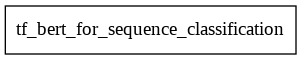

In [30]:
# Herzlich wenig Informationen..
tf.keras.utils.plot_model(model)

Nun das übliche: Lossfunktion definieren, Modell kompilieren, Modell fitten.

In [31]:
loss_fn = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE, from_logits=True)
opt = tf.keras.optimizers.Adam(learning_rate=3e-5)
model.compile(optimizer=opt, loss=loss_fn, metrics=["accuracy"]) # andere Metric für die Modellqualität auswählen -> Accuracy für unbalanced wohl nicht die beste , tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
# https://keras.io/api/metrics/
model.fit(tfdataset, epochs=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

In [32]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(tfdataset_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
129/129 [==============================] - 46s 337ms/step - loss: 0.0493 - accuracy: 0.9805
test loss, test acc: [0.04933295398950577, 0.9805447459220886]
